In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/sample_data/Tweets 2.csv")
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


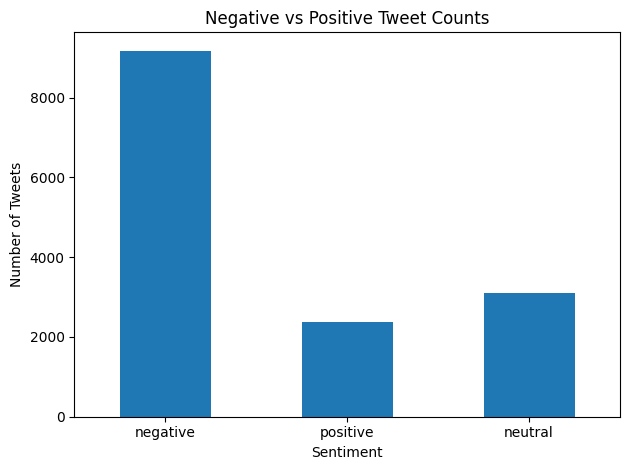

In [ ]:

import matplotlib.pyplot as plt

counts = df["airline_sentiment"].value_counts().reindex(["negative", "positive","neutral"])

plt.figure()
counts.plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Negative vs Positive Tweet Counts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import re, string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(lambda txt: word_tokenize(txt))
print(df['text'].head())

0       [@, VirginAmerica, What, @, dhepburn, said, .]
1    [@, VirginAmerica, plus, you, 've, added, comm...
2    [@, VirginAmerica, I, did, n't, today, ..., Mu...
3    [@, VirginAmerica, it, 's, really, aggressive,...
4    [@, VirginAmerica, and, it, 's, a, really, big...
Name: text, dtype: object


In [ ]:
df['text'] = df['text'].apply(lambda tokens: [t.lower() for t in tokens])
print(df['text'].head())

0       [@, virginamerica, what, @, dhepburn, said, .]
1    [@, virginamerica, plus, you, 've, added, comm...
2    [@, virginamerica, i, did, n't, today, ..., mu...
3    [@, virginamerica, it, 's, really, aggressive,...
4    [@, virginamerica, and, it, 's, a, really, big...
Name: text, dtype: object


In [ ]:
def get_synonym(word):
    syns = wordnet.synsets(word)
    return syns[0].lemmas()[0].name() if syns else word

df['text'] = df['text'].apply(lambda tokens: [get_synonym(t) for t in tokens])
print(df['text'].head())


0      [@, virginamerica, what, @, dhepburn, state, .]
1    [@, virginamerica, asset, you, 've, add, comme...
2    [@, virginamerica, iodine, make, n't, today, ....
3    [@, virginamerica, information_technology, 's,...
4    [@, virginamerica, and, information_technology...
Name: text, dtype: object


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

df['text'] = df['text'].apply(lambda tokens: [ps.stem(t) for t in tokens])
print(df['text'].head())

0      [@, virginamerica, what, @, dhepburn, state, .]
1    [@, virginamerica, asset, you, 've, add, comme...
2    [@, virginamerica, iodin, make, n't, today, .....
3    [@, virginamerica, information_technolog, 's, ...
4    [@, virginamerica, and, information_technolog,...
Name: text, dtype: object


In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

df['text'] = df['text'].apply(
    lambda tokens: [wnl.lemmatize(porter.stem(t)) for t in tokens]
)

print(df['text'].head())


0      [@, virginamerica, what, @, dhepburn, state, .]
1    [@, virginamerica, asset, you, 've, add, comme...
2    [@, virginamerica, iodin, make, n't, today, .....
3    [@, virginamerica, information_technolog, 's, ...
4    [@, virginamerica, and, information_technolog,...
Name: text, dtype: object


In [ ]:
stops = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda tokens: [t for t in tokens if t not in stops])
print(df['text'].head())

0            [@, virginamerica, @, dhepburn, state, .]
1    [@, virginamerica, asset, 've, add, commerci, ...
2    [@, virginamerica, iodin, make, n't, today, .....
3    [@, virginamerica, information_technolog, 's, ...
4    [@, virginamerica, information_technolog, 's, ...
Name: text, dtype: object


In [ ]:
import re


punct_re = re.compile(r'[^\w\s]')

df['text'] = df['text'].apply(
    lambda tokens: [
        clean := punct_re.sub('', t)
        for t in tokens
        if (clean := punct_re.sub('', t))
    ]
)
print(df['text'].head())

0                     [virginamerica, dhepburn, state]
1    [virginamerica, asset, ve, add, commerci, expe...
2    [virginamerica, iodin, make, nt, today, must, ...
3    [virginamerica, information_technolog, s, trul...
4    [virginamerica, information_technolog, s, angs...
Name: text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


df['clean_text'] = df['text'].apply(lambda tokens: ' '.join(tokens))

tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

print(f"TF-IDF Shape: {X_tfidf.shape}")


TF-IDF Shape: (14640, 3000)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


X = df['text'].apply(lambda toks: ' '.join(toks))
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=42
)


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)


clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
clf.get_params()


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = clf.predict(X_test_vec)

print("Accuracy       :", accuracy_score(y_test, y_pred))
print("Precision      :", precision_score(y_test, y_pred, average='weighted'))
print("Recall         :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score       :", f1_score(y_test, y_pred, average='weighted'))




Accuracy       : 0.7735655737704918
Precision      : 0.7662039837459811
Recall         : 0.7735655737704918
F1-score       : 0.748133346421786


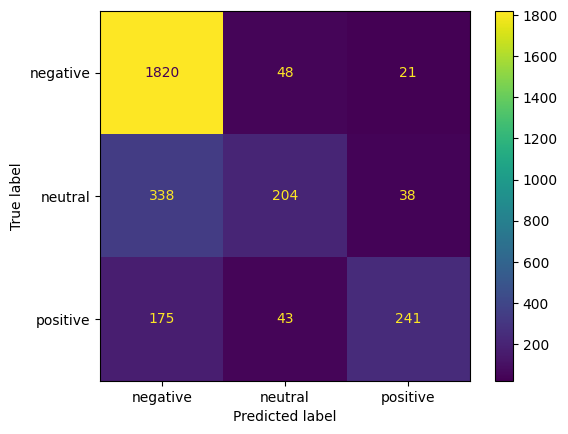

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
